<a href="https://colab.research.google.com/github/yuktimittal/Emotion-Classification-using-EEG-Brain-waves/blob/master/logo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir(r'/content/drive/My Drive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut

file_x = 'data/32/features_raw.dat'
file_y = 'data/label_class_0_3.5.dat'
y = np.genfromtxt(file_y, delimiter=' ')
X = np.genfromtxt(file_x, delimiter=' ')

In [ ]:
grp=[]
for i in range(1,33):
  for j in range(40):
    grp.append(i)

In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from numpy import sort
from sklearn.svm import SVC

In [ ]:
def f(xx):
      try:
        if float(xx)<0.05:
          return xx
      except:
        return NaN

loo = LeaveOneGroupOut()
prediction=[]
actual=[]
results=[]
count=1
for train_index, test_index in loo.split(X,y,grp):
  
      print(count)
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      #Feature Scaling
      from sklearn.preprocessing import StandardScaler
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      X_train_pd=pd.DataFrame(X_train)
      X_test_pd=pd.DataFrame(X_test)
      from sklearn.feature_selection import SelectKBest, f_classif
      X_indices = np.arange(X.shape[-1])
      selector = SelectKBest(f_classif)
      selector.fit(X_train, y_train)
      #dell = -np.log10(selector.pvalues_)
      #dell /= dell.max()
      dell1=pd.DataFrame(selector.pvalues_,columns=None)
      dell1[0]=dell1[0].apply(f)
      l=dell1.dropna().to_dict()[0].keys()
      X_train_pd=X_train_pd[l]
      X_test_pd=X_test_pd[l]
      X_train=X_train_pd.to_numpy()
      X_test=X_test_pd.to_numpy()
        
      # SVM Classifier
      model = XGBClassifier()
      model.fit(X_train, y_train)
      thresholds = sort(model.feature_importances_)
      selection = SelectFromModel(model, threshold=thresholds[-5], prefit=True)
      select_X_train = selection.transform(X_train)
      selection_model = SVC(kernel = 'rbf', random_state = 5)
      selection_model.fit(select_X_train, y_train)
      select_X_test = selection.transform(X_test)
      predictions = selection_model.predict(select_X_test)
      accuracy = accuracy_score(y_test, predictions)
      print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresholds[-5], select_X_train.shape[1], accuracy*100.0))
      results.append(accuracy*100.0)
      prediction.append(predictions)
      actual.append(y_test)   
      count+=1

1
Thresh=0.007, n=5, Accuracy: 60.00%
2
Thresh=0.007, n=5, Accuracy: 75.00%
3
Thresh=0.007, n=5, Accuracy: 92.50%
4
Thresh=0.007, n=5, Accuracy: 47.50%
5
Thresh=0.007, n=5, Accuracy: 80.00%
6
Thresh=0.007, n=5, Accuracy: 92.50%
7
Thresh=0.007, n=5, Accuracy: 77.50%
8
Thresh=0.007, n=5, Accuracy: 87.50%
9
Thresh=0.008, n=5, Accuracy: 77.50%
10
Thresh=0.007, n=5, Accuracy: 75.00%
11
Thresh=0.006, n=5, Accuracy: 80.00%
12
Thresh=0.007, n=5, Accuracy: 62.50%
13
Thresh=0.007, n=5, Accuracy: 70.00%
14
Thresh=0.006, n=5, Accuracy: 60.00%
15
Thresh=0.007, n=5, Accuracy: 75.00%
16
Thresh=0.007, n=5, Accuracy: 67.50%
17
Thresh=0.007, n=5, Accuracy: 90.00%
18
Thresh=0.007, n=5, Accuracy: 95.00%
19
Thresh=0.008, n=5, Accuracy: 72.50%
20
Thresh=0.007, n=5, Accuracy: 82.50%
21
Thresh=0.007, n=5, Accuracy: 80.00%
22
Thresh=0.007, n=5, Accuracy: 62.50%
23
Thresh=0.007, n=5, Accuracy: 92.50%
24
Thresh=0.007, n=5, Accuracy: 70.00%
25
Thresh=0.007, n=5, Accuracy: 62.50%
26
Thresh=0.007, n=5, Accuracy: 70

In [ ]:
prediction=np.concatenate(prediction).ravel().tolist()
actual=np.concatenate(actual).ravel().tolist()
print(confusion_matrix(actual, prediction)) 
print("mean= ",np.mean(results))
print("standard deviation= ",np.std(results))  
print("ACCURACY=", accuracy_score(actual, prediction)*100) 

[[  5 292]
 [ 10 973]]
mean=  76.40625
standard deviation=  11.658176784450474
ACCURACY= 76.40625


In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut

file_x = 'data/32/features_raw.dat'
file_y = 'data/label_class_1_3.5.dat'
y = np.genfromtxt(file_y, delimiter=' ')
X = np.genfromtxt(file_x, delimiter=' ')

In [ ]:
def f(xx):
      try:
        if float(xx)<0.05:
          return xx
      except:
        return NaN

loo = LeaveOneGroupOut()
prediction1=[]
actual1=[]
results1=[]
count=1
for train_index, test_index in loo.split(X,y,grp):
  
      print(count)
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      #Feature Scaling
      from sklearn.preprocessing import StandardScaler
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      X_train_pd=pd.DataFrame(X_train)
      X_test_pd=pd.DataFrame(X_test)
      from sklearn.feature_selection import SelectKBest, f_classif
      X_indices = np.arange(X.shape[-1])
      selector = SelectKBest(f_classif)
      selector.fit(X_train, y_train)
      #dell = -np.log10(selector.pvalues_)
      #dell /= dell.max()
      dell1=pd.DataFrame(selector.pvalues_,columns=None)
      dell1[0]=dell1[0].apply(f)
      l=dell1.dropna().to_dict()[0].keys()
      X_train_pd=X_train_pd[l]
      X_test_pd=X_test_pd[l]
      X_train=X_train_pd.to_numpy()
      X_test=X_test_pd.to_numpy()
        
      # SVM Classifier
      model = XGBClassifier()
      model.fit(X_train, y_train)
      thresholds = sort(model.feature_importances_)
      selection = SelectFromModel(model, threshold=thresholds[-5], prefit=True)
      select_X_train = selection.transform(X_train)
      selection_model = SVC(kernel = 'rbf', random_state = 5)
      selection_model.fit(select_X_train, y_train)
      select_X_test = selection.transform(X_test)
      predictions = selection_model.predict(select_X_test)
      accuracy = accuracy_score(y_test, predictions)
      print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresholds[-5], select_X_train.shape[1], accuracy*100.0))
      results1.append(accuracy*100.0)
      prediction1.append(predictions)
      actual1.append(y_test)   
      count+=1

1
Thresh=0.007, n=5, Accuracy: 72.50%
2
Thresh=0.006, n=5, Accuracy: 67.50%
3
Thresh=0.006, n=5, Accuracy: 50.00%
4
Thresh=0.006, n=5, Accuracy: 57.50%
5
Thresh=0.006, n=5, Accuracy: 82.50%
6
Thresh=0.007, n=5, Accuracy: 77.50%
7
Thresh=0.007, n=5, Accuracy: 75.00%
8
Thresh=0.006, n=5, Accuracy: 90.00%
9
Thresh=0.006, n=5, Accuracy: 100.00%
10
Thresh=0.006, n=5, Accuracy: 77.50%
11
Thresh=0.008, n=5, Accuracy: 52.50%
12
Thresh=0.006, n=5, Accuracy: 87.50%
13
Thresh=0.007, n=5, Accuracy: 92.50%
14
Thresh=0.006, n=5, Accuracy: 72.50%
15
Thresh=0.007, n=5, Accuracy: 80.00%
16
Thresh=0.006, n=5, Accuracy: 75.00%
17
Thresh=0.007, n=5, Accuracy: 82.50%
18
Thresh=0.007, n=5, Accuracy: 92.50%
19
Thresh=0.007, n=5, Accuracy: 82.50%
20
Thresh=0.007, n=5, Accuracy: 90.00%
21
Thresh=0.006, n=5, Accuracy: 90.00%
22
Thresh=0.007, n=5, Accuracy: 80.00%
23
Thresh=0.006, n=5, Accuracy: 42.50%
24
Thresh=0.007, n=5, Accuracy: 85.00%
25
Thresh=0.007, n=5, Accuracy: 80.00%
26
Thresh=0.007, n=5, Accuracy: 5

In [ ]:
prediction1=np.concatenate(prediction1).ravel().tolist()
actual1=np.concatenate(actual1).ravel().tolist()
print(confusion_matrix(actual1, prediction1)) 
print("mean= ",np.mean(results1))
print("standard deviation= ",np.std(results1))  
print("ACCURACY=", accuracy_score(actual1, prediction1)*100) 

[[  3 301]
 [  7 969]]
mean=  75.9375
standard deviation=  13.901860262209516
ACCURACY= 75.9375


In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut

file_x = 'data/32/features_raw.dat'
file_y = 'data/label_class_2_3.5.dat'
y = np.genfromtxt(file_y, delimiter=' ')
X = np.genfromtxt(file_x, delimiter=' ')

In [ ]:
def f(xx):
      try:
        if float(xx)<0.05:
          return xx
      except:
        return NaN

loo = LeaveOneGroupOut()
prediction2=[]
actual2=[]
results2=[]
count=1
for train_index, test_index in loo.split(X,y,grp):
  
      print(count)
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      #Feature Scaling
      from sklearn.preprocessing import StandardScaler
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      X_train_pd=pd.DataFrame(X_train)
      X_test_pd=pd.DataFrame(X_test)
      from sklearn.feature_selection import SelectKBest, f_classif
      X_indices = np.arange(X.shape[-1])
      selector = SelectKBest(f_classif)
      selector.fit(X_train, y_train)
      #dell = -np.log10(selector.pvalues_)
      #dell /= dell.max()
      dell1=pd.DataFrame(selector.pvalues_,columns=None)
      dell1[0]=dell1[0].apply(f)
      l=dell1.dropna().to_dict()[0].keys()
      X_train_pd=X_train_pd[l]
      X_test_pd=X_test_pd[l]
      X_train=X_train_pd.to_numpy()
      X_test=X_test_pd.to_numpy()
        
      # SVM Classifier
      model = XGBClassifier()
      model.fit(X_train, y_train)
      thresholds = sort(model.feature_importances_)
      selection = SelectFromModel(model, threshold=thresholds[-5], prefit=True)
      select_X_train = selection.transform(X_train)
      selection_model = SVC(kernel = 'rbf', random_state = 5)
      selection_model.fit(select_X_train, y_train)
      select_X_test = selection.transform(X_test)
      predictions = selection_model.predict(select_X_test)
      accuracy = accuracy_score(y_test, predictions)
      print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresholds[-5], select_X_train.shape[1], accuracy*100.0))
      results2.append(accuracy*100.0)
      prediction2.append(predictions)
      actual2.append(y_test)   
      count+=1

1
Thresh=0.009, n=5, Accuracy: 75.00%
2
Thresh=0.009, n=5, Accuracy: 75.00%
3
Thresh=0.008, n=5, Accuracy: 80.00%
4
Thresh=0.010, n=5, Accuracy: 55.00%
5
Thresh=0.009, n=5, Accuracy: 60.00%
6
Thresh=0.009, n=5, Accuracy: 82.50%
7
Thresh=0.008, n=5, Accuracy: 60.00%
8
Thresh=0.008, n=5, Accuracy: 77.50%
9
Thresh=0.009, n=5, Accuracy: 77.50%
10
Thresh=0.009, n=5, Accuracy: 85.00%
11
Thresh=0.009, n=5, Accuracy: 82.50%
12
Thresh=0.008, n=5, Accuracy: 57.50%
13
Thresh=0.009, n=5, Accuracy: 62.50%
14
Thresh=0.009, n=5, Accuracy: 72.50%
15
Thresh=0.008, n=5, Accuracy: 70.00%
16
Thresh=0.008, n=5, Accuracy: 65.00%
17
Thresh=0.007, n=5, Accuracy: 100.00%
18
Thresh=0.009, n=5, Accuracy: 97.50%
19
Thresh=0.008, n=5, Accuracy: 77.50%
20
Thresh=0.008, n=5, Accuracy: 75.00%
21
Thresh=0.008, n=5, Accuracy: 80.00%
22
Thresh=0.008, n=5, Accuracy: 85.00%
23
Thresh=0.008, n=5, Accuracy: 97.50%
24
Thresh=0.009, n=5, Accuracy: 82.50%
25
Thresh=0.007, n=5, Accuracy: 97.50%
26
Thresh=0.008, n=5, Accuracy: 8

In [ ]:
prediction2=np.concatenate(prediction2).ravel().tolist()
actual2=np.concatenate(actual2).ravel().tolist()
print(confusion_matrix(actual2, prediction2)) 
print("mean= ",np.mean(results2))
print("standard deviation= ",np.std(results2))  
print("ACCURACY=", accuracy_score(actual2, prediction2)*100) 

[[   0  279]
 [   0 1001]]
mean=  78.203125
standard deviation=  13.128487259938785
ACCURACY= 78.203125


In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut

file_x = 'data/32/features_raw.dat'
file_y = 'data/label_class_3_3.5.dat'
y = np.genfromtxt(file_y, delimiter=' ')
X = np.genfromtxt(file_x, delimiter=' ')

In [ ]:
def f(xx):
      try:
        if float(xx)<0.05:
          return xx
      except:
        return NaN

loo = LeaveOneGroupOut()
prediction3=[]
actual3=[]
results3=[]
count=1
for train_index, test_index in loo.split(X,y,grp):
  
      print(count)
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      #Feature Scaling
      from sklearn.preprocessing import StandardScaler
      sc = StandardScaler()
      X_train = sc.fit_transform(X_train)
      X_test = sc.transform(X_test)

      X_train_pd=pd.DataFrame(X_train)
      X_test_pd=pd.DataFrame(X_test)
      from sklearn.feature_selection import SelectKBest, f_classif
      X_indices = np.arange(X.shape[-1])
      selector = SelectKBest(f_classif)
      selector.fit(X_train, y_train)
      #dell = -np.log10(selector.pvalues_)
      #dell /= dell.max()
      dell1=pd.DataFrame(selector.pvalues_,columns=None)
      dell1[0]=dell1[0].apply(f)
      l=dell1.dropna().to_dict()[0].keys()
      X_train_pd=X_train_pd[l]
      X_test_pd=X_test_pd[l]
      X_train=X_train_pd.to_numpy()
      X_test=X_test_pd.to_numpy()
        
      # SVM Classifier
      model = XGBClassifier()
      model.fit(X_train, y_train)
      thresholds = sort(model.feature_importances_)
      selection = SelectFromModel(model, threshold=thresholds[-5], prefit=True)
      select_X_train = selection.transform(X_train)
      selection_model = SVC(kernel = 'rbf', random_state = 5)
      selection_model.fit(select_X_train, y_train)
      select_X_test = selection.transform(X_test)
      predictions = selection_model.predict(select_X_test)
      accuracy = accuracy_score(y_test, predictions)
      print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresholds[-5], select_X_train.shape[1], accuracy*100.0))
      results3.append(accuracy*100.0)
      prediction3.append(predictions)
      actual3.append(y_test)   
      count+=1

1
Thresh=0.007, n=5, Accuracy: 100.00%
2
Thresh=0.008, n=5, Accuracy: 70.00%
3
Thresh=0.007, n=5, Accuracy: 97.50%
4
Thresh=0.007, n=5, Accuracy: 67.50%
5
Thresh=0.007, n=5, Accuracy: 85.00%
6
Thresh=0.007, n=5, Accuracy: 85.00%
7
Thresh=0.007, n=5, Accuracy: 92.50%
8
Thresh=0.007, n=5, Accuracy: 90.00%
9
Thresh=0.007, n=5, Accuracy: 100.00%
10
Thresh=0.007, n=5, Accuracy: 87.50%
11
Thresh=0.007, n=5, Accuracy: 55.00%
12
Thresh=0.007, n=5, Accuracy: 65.00%
13
Thresh=0.008, n=5, Accuracy: 80.00%
14
Thresh=0.007, n=5, Accuracy: 80.00%
15
Thresh=0.007, n=5, Accuracy: 75.00%
16
Thresh=0.007, n=5, Accuracy: 57.50%
17
Thresh=0.007, n=5, Accuracy: 80.00%
18
Thresh=0.007, n=5, Accuracy: 92.50%
19
Thresh=0.007, n=5, Accuracy: 77.50%
20
Thresh=0.008, n=5, Accuracy: 82.50%
21
Thresh=0.007, n=5, Accuracy: 72.50%
22
Thresh=0.006, n=5, Accuracy: 62.50%
23
Thresh=0.007, n=5, Accuracy: 60.00%
24
Thresh=0.006, n=5, Accuracy: 82.50%
25
Thresh=0.007, n=5, Accuracy: 67.50%
26
Thresh=0.007, n=5, Accuracy: 

In [ ]:
prediction3=np.concatenate(prediction3).ravel().tolist()
actual3=np.concatenate(actual3).ravel().tolist()
print(confusion_matrix(actual3, prediction3)) 
print("mean= ",np.mean(results3))
print("standard deviation= ",np.std(results3))  
print("ACCURACY=", accuracy_score(actual3, prediction3)*100) 

[[  3 285]
 [  6 986]]
mean=  77.265625
standard deviation=  12.442985206909755
ACCURACY= 77.265625


In [ ]:
results_final=[0]*32
for i in range(32):
  results_final[i]=(results[i]+results1[i]+results2[i]+results3[i])/4


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

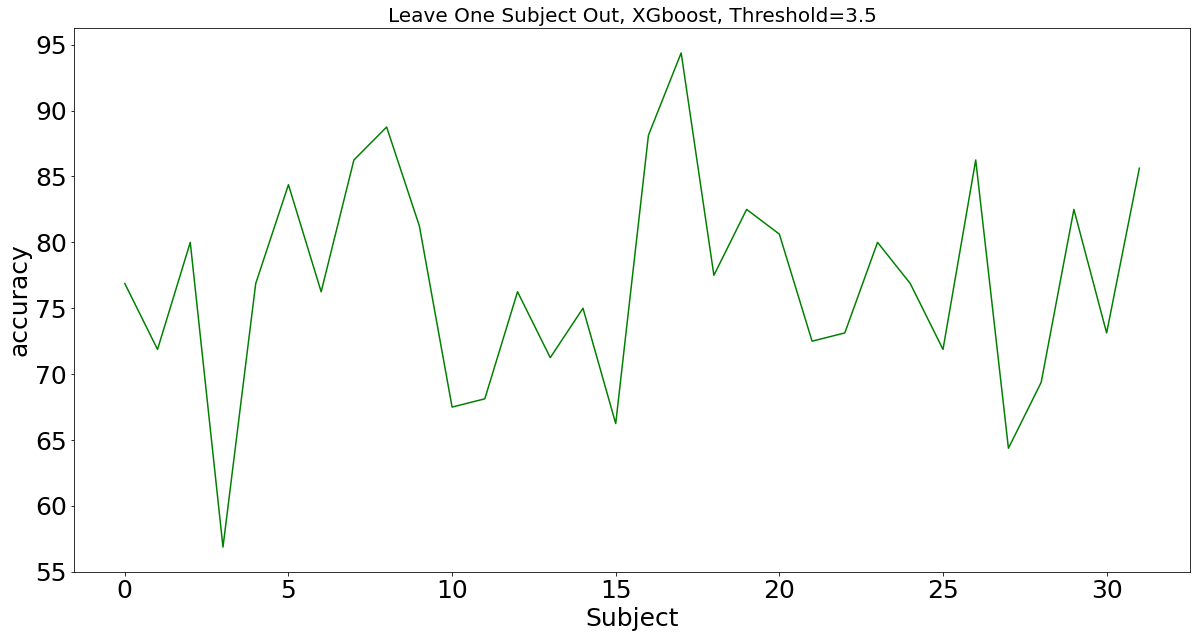

In [ ]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(32)], results_final, color='g')
plt.xlabel('Subject', fontsize=25)
plt.ylabel('accuracy', fontsize=25)
plt.title('Leave One Subject Out, XGboost, Threshold=3.5', fontsize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()